In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import random

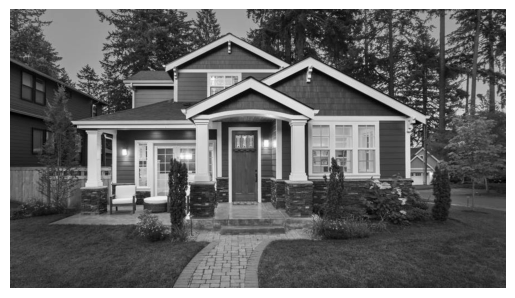

In [2]:
img = cv2.imread('house.jpg' , 0)
plt.imshow(img , cmap = 'gray')
plt.axis('off')
plt.show()

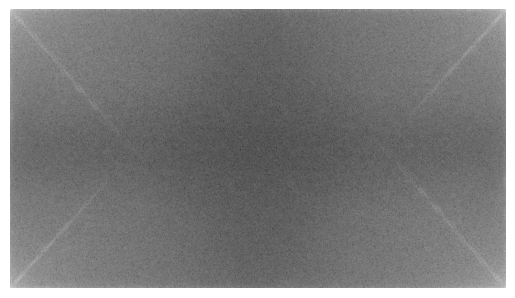

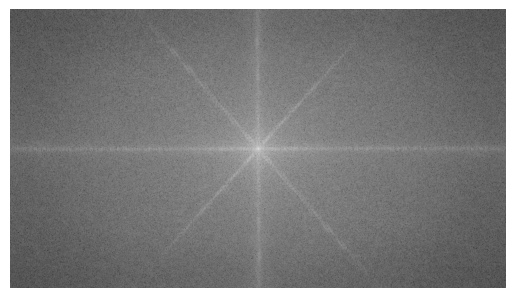

In [10]:
#Switch to Frequency Domain

#fourier transform
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)), cmap = 'gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)) , cmap = 'gray')
plt.axis('off')
plt.show()

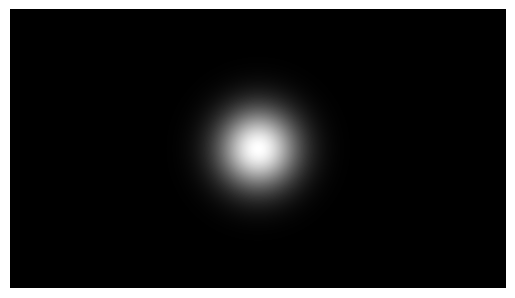

In [8]:
#gaussian low pass filter
M , N = img.shape

H = np.zeros(img.shape)
D0 = 50

for u in range(M):
    for v in range(N):
        D = pow((pow(u - (M/2), 2) + pow(v - (N/2), 2)), 0.5)
        H[u][v] = pow(math.e , -((D*D) / (2*D0*D0)))
        
plt.imshow(H , cmap = 'gray')
plt.axis('off')
plt.show()

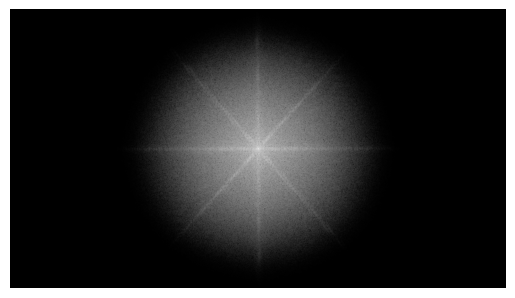

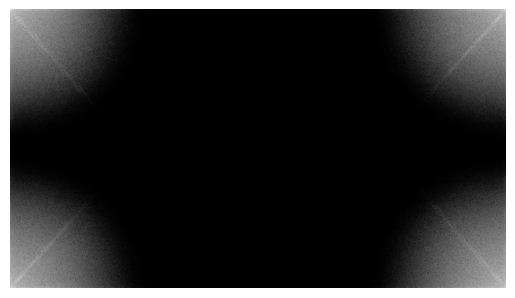

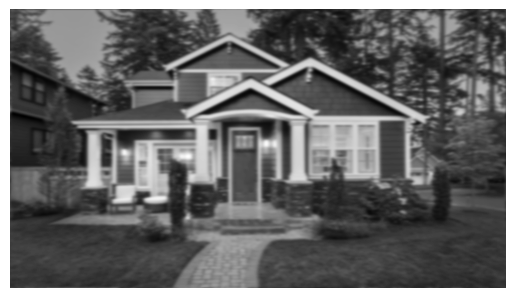

In [11]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)) , cmap = 'gray')
plt.axis('off')
plt.show()

#inverse fourier transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)) , cmap = 'gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g , cmap = 'gray')
plt.axis('off')
plt.show()

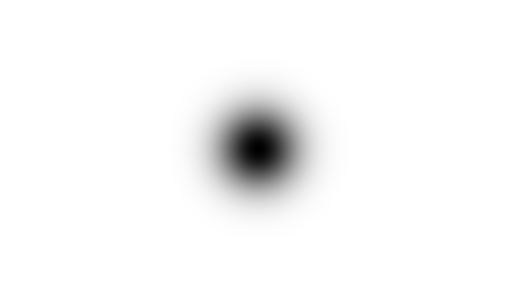

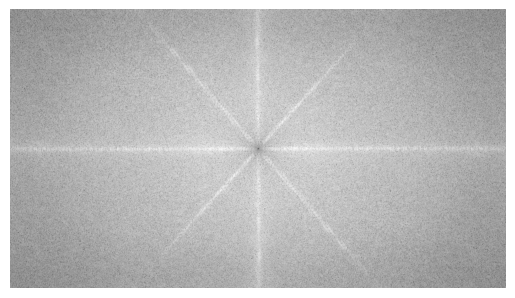

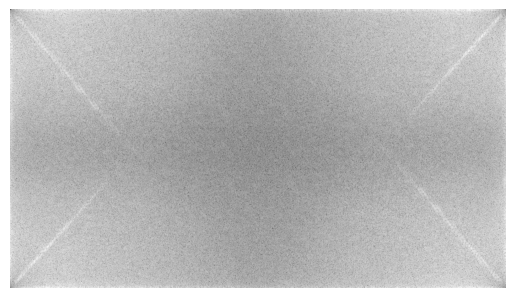

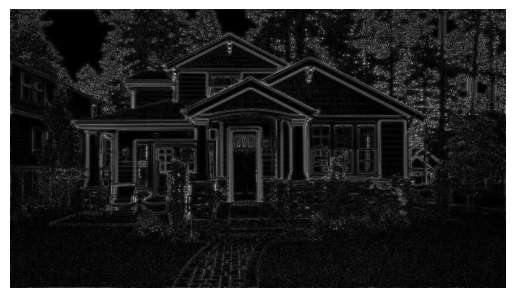

In [14]:
#gaussian high pass filter
H = 1 - H
plt.imshow(H , cmap = 'gray')
plt.axis('off')
plt.show()

Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)) , cmap = 'gray')
plt.axis('off')
plt.show()

G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)) , cmap = 'gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g , cmap = 'gray')
plt.axis('off')
plt.show()